In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Data and Exploration**

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [3]:
BATCH_SIZE = 8
IMAGE_SIZE = (128,128)

In [4]:
train_data_dir = "/content/drive/MyDrive/Preg - Final/train"
test_data_dir = "/content/drive/MyDrive/Preg - Final/test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.16,
                                                         seed=50)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.16,
                                                         seed=50)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)

Found 195 files belonging to 2 classes.
Using 164 files for training.
Found 195 files belonging to 2 classes.
Using 31 files for validation.
Found 26 files belonging to 2 classes.


In [5]:
class_names = train_data.class_names
class_names

['Not Pregnant Fish', 'Pregnant Fish']

In [6]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(8, 128, 128, 3)
(8,)


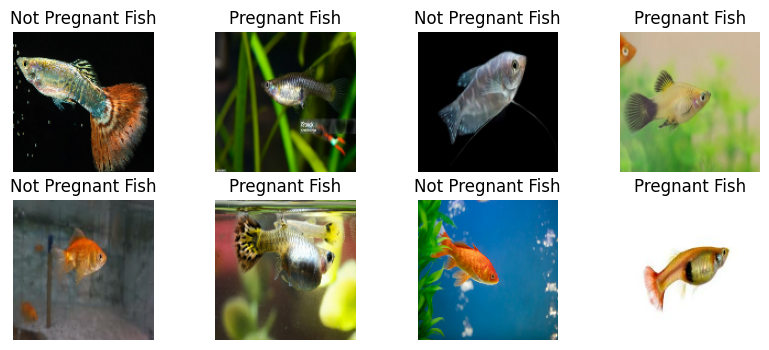

In [7]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(8):
        ax = plt.subplot(2,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

# **Data Preprocessing**

# **Scaling Images**

In [8]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.00000000e+00 1.13140625e+02 1.23140625e+02]
   [0.00000000e+00 1.19250000e+02 1.27875000e+02]
   [0.00000000e+00 1.20625000e+02 1.29828125e+02]
   ...
   [4.68750000e-02 1.08000000e+02 1.21140625e+02]
   [0.00000000e+00 1.06296875e+02 1.21765625e+02]
   [0.00000000e+00 1.05015625e+02 1.19234375e+02]]

  [[0.00000000e+00 1.10875000e+02 1.21921875e+02]
   [2.34375000e-01 1.18375000e+02 1.27625000e+02]
   [0.00000000e+00 1.20625000e+02 1.29750000e+02]
   ...
   [2.34375000e-01 1.07859375e+02 1.23515625e+02]
   [0.00000000e+00 1.06625000e+02 1.21218750e+02]
   [0.00000000e+00 1.04656250e+02 1.20796875e+02]]

  [[0.00000000e+00 1.10281250e+02 1.21328125e+02]
   [0.00000000e+00 1.15984375e+02 1.25234375e+02]
   [0.00000000e+00 1.17000000e+02 1.27750000e+02]
   ...
   [0.00000000e+00 1.07015625e+02 1.26156250e+02]
   [0.00000000e+00 1.05468750e+02 1.25250000e+02]
   [0.00000000e+00 1.00609375e+02 1.22421875e+02]]

  ...

  [[1.47625000e+02 2.01750000e+02 0.00000000e+00]
   [1

In [9]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[6.85819864e-01 6.85508549e-01 5.66375613e-01]
   [6.74702168e-01 6.74808800e-01 5.55675864e-01]
   [6.84001207e-01 6.83412969e-01 5.64099252e-01]
   ...
   [8.13651919e-01 7.75922179e-01 5.65107226e-01]
   [8.20840120e-01 7.83110321e-01 5.72295368e-01]
   [8.36029410e-01 7.98299611e-01 5.91309428e-01]]

  [[6.02327824e-01 6.08946681e-01 5.14331460e-01]
   [5.90751112e-01 5.98750651e-01 4.89791036e-01]
   [5.97230315e-01 5.99096179e-01 4.98566031e-01]
   ...
   [7.86970019e-01 7.50606775e-01 5.41228592e-01]
   [7.85103559e-01 7.51572847e-01 5.35540998e-01]
   [7.93604195e-01 7.65770853e-01 5.49663603e-01]]

  [[5.19028783e-01 5.30557632e-01 4.61734056e-01]
   [5.14620125e-01 5.26265264e-01 4.57383573e-01]
   [5.14889717e-01 5.26792228e-01 4.57307160e-01]
   ...
   [6.58609211e-01 6.35432005e-01 4.30300295e-01]
   [6.63094282e-01 6.39684379e-01 4.34255451e-01]
   [6.80827200e-01 6.56957686e-01 4.51470584e-01]]

  ...

  [[3.98397654e-01 4.36639100e-01 4.02837008e-01]
   [4

# **Data Augmentation**

In [11]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal", input_shape=(128, 128, 3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2)
    ]
)

# **Model Building**

# **Model Architecture - 1**

In [12]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))



*   Sequential model with data augmentation for increased training dataset diversity.
*   Three Convolutional layers (32, 64, and 128 filters) with ReLU activation, capturing spatial patterns.
*MaxPooling layers after each convolutional layer, reducing spatial dimensions.
*Dropout layer (0.2) to prevent overfitting.
*Batch Normalization layer for stabilizing and accelerating training.
*Flatten layer to prepare for fully connected layers.
*Three Dense layers (128, 128, and 32 units) with ReLU activation.
*Output layer with 1 unit and sigmoid activation for binary classification.


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [15]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=30,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/30
21/21 [==============================] - 8s 75ms/step - loss: 0.9436 - accuracy: 0.5366 - val_loss: 0.7721 - val_accuracy: 0.4194
Epoch 2/30
21/21 [==============================] - 1s 53ms/step - loss: 0.8747 - accuracy: 0.5671 - val_loss: 0.7585 - val_accuracy: 0.3548
Epoch 3/30
21/21 [==============================] - 1s 34ms/step - loss: 0.6330 - accuracy: 0.6280 - val_loss: 0.6788 - val_accuracy: 0.5484
Epoch 4/30
21/21 [==============================] - 1s 35ms/step - loss: 0.5982 - accuracy: 0.6951 - val_loss: 0.6628 - val_accuracy: 0.6774
Epoch 5/30
21/21 [==============================] - 1s 35ms/step - loss: 0.5811 - accuracy: 0.7195 - val_loss: 0.7571 - val_accuracy: 0.4839
Epoch 6/30
21/21 [==============================] - 1s 35ms/step - loss: 0.5681 - accuracy: 0.7500 - val_loss: 0.8814 - val_accuracy: 0.4839
Epoch 7/30
21/21 [==============================] - 1s 35ms/step - loss: 0.5370 - accuracy: 0.7195 - val_loss: 0.9363 - val_accuracy: 0.4516
Epoch 8/30
21

In [16]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 51.299 seconds


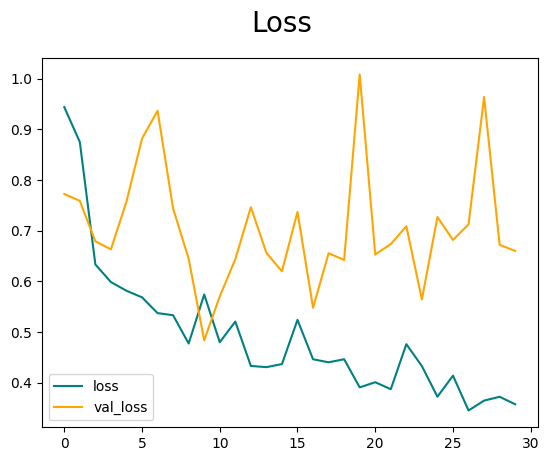

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

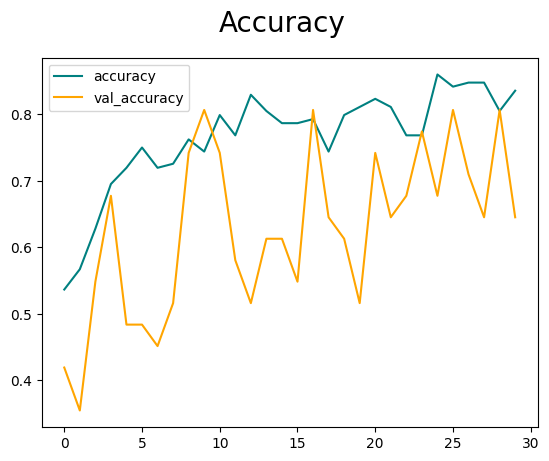

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# **Model Evaluation**

In [19]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [20]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 181ms/step


In [21]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [22]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.46153846>

In [23]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7307692>

# **Model Architecture - 2**

In [24]:
model1 = tf.keras.models.Sequential()

model1.add(data_augmentation)

model1.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D())

model1.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D())

model1.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.MaxPooling2D())

model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(32, activation='relu'))

model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# **1.Data Augmentation Layer:**

* Purpose: Increases training dataset diversity.

*   Operations:
  Rescaling: Normalizes pixel values to the range [0, 1].
  Random Horizontal Flipping: Augments with random flips.
  Random Rotation: Augments with random rotations.
  Random Zooming: Augments with random zoom.

# **2.Convolutional Layers:**

**First Convolutional Layer:**

Filters: 32 filters.

*   Kernel Size: 3x3.
Activation Function: ReLU.
*   Normalization: Batch Normalization.
Pooling: MaxPooling with a 2x2 pool size.


**Second Convolutional Layer:**

Filters: 64 filters.

*   Kernel Size: 3x3.
Activation Function: ReLU.
*   Normalization: Batch Normalization.
Pooling: MaxPooling with a 2x2 pool size.

**Third Convolutional Layer:**

Filters: 128 filters.


*   Kernel Size: 3x3.
Activation Function: ReLU
*   Normalization: Batch Normalization.
Pooling: MaxPooling with a 2x2 pool size.

# **3.Dropout and Flatten Layers:**
Dropout Layer:
Rate: 0.5 (50% of units are dropped during training for regularization).
Flatten Layer:
Purpose: Transforms the 3D output to 1D for the fully connected layers.

**Dense (Fully Connected) Layers:**

**First Dense Layer:**

Neurons: 128 neurons.
Activation Function: ReLU.
Dropout: 0.5 (50% dropout for regularization).

**Second Dense Layer:**

Neurons: 128 neurons.
Activation Function: ReLU.
Dropout: 0.3 (30% dropout for regularization).

**Third Dense Layer:**

Neurons: 32 neurons.
Activation Function: ReLU.

**Output Layer:**
Dense Layer:

*   Neurons: 1 neuron (for binary classification)
*   Activation Function: Sigmoid (for binary classification probability output).

In [25]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)      

In [26]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [27]:
start_time = time.time()

history = model1.fit(train_data,
                    epochs=30,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/30
21/21 [==============================] - 3s 44ms/step - loss: 0.8993 - accuracy: 0.5854 - val_loss: 0.6932 - val_accuracy: 0.4516
Epoch 2/30
21/21 [==============================] - 1s 36ms/step - loss: 0.7264 - accuracy: 0.5366 - val_loss: 0.6855 - val_accuracy: 0.5806
Epoch 3/30
21/21 [==============================] - 1s 55ms/step - loss: 0.7113 - accuracy: 0.5915 - val_loss: 0.6770 - val_accuracy: 0.5161
Epoch 4/30
21/21 [==============================] - 1s 51ms/step - loss: 0.6373 - accuracy: 0.6524 - val_loss: 0.6718 - val_accuracy: 0.4839
Epoch 5/30
21/21 [==============================] - 1s 40ms/step - loss: 0.7686 - accuracy: 0.6159 - val_loss: 0.6465 - val_accuracy: 0.6129
Epoch 6/30
21/21 [==============================] - 1s 40ms/step - loss: 0.6165 - accuracy: 0.6951 - val_loss: 0.6687 - val_accuracy: 0.7419
Epoch 7/30
21/21 [==============================] - 1s 34ms/step - loss: 0.6199 - accuracy: 0.6890 - val_loss: 0.6229 - val_accuracy: 0.6129
Epoch 8/30
21

In [28]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 49.915 seconds


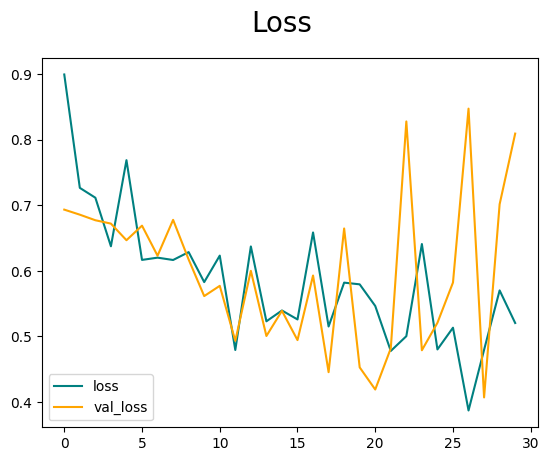

In [29]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

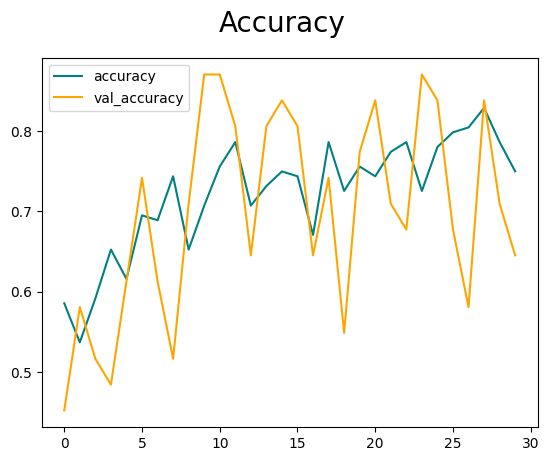

In [30]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

# **Model Evaluation**

In [31]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [32]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model1.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 31ms/step


In [33]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [34]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.23076923>

In [35]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.61538464>

# **Test/Predictions**

**Using Model Architecture 1**

In [36]:
import cv2

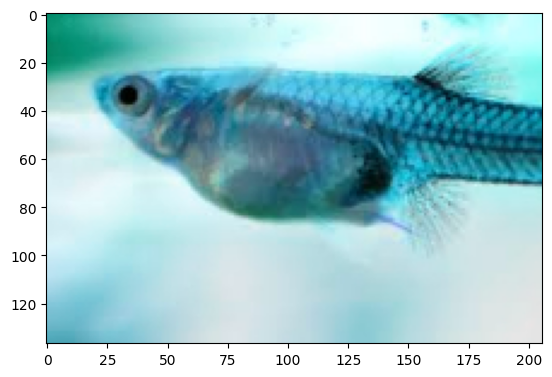

In [53]:
img = cv2.imread('/content/drive/MyDrive/Preg - Final/test/Pregnant Fish/TestP7.jpg')
plt.imshow(img)
plt.show()

In [54]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [55]:
scaled_image.shape

TensorShape([128, 128, 3])

In [56]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [57]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 18ms/step


In [58]:
yhat

array([[0.38230848]], dtype=float32)

In [59]:
class_names

['Not Pregnant Fish', 'Pregnant Fish']

In [60]:
if yhat > 0.1:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

Pregnant Fish


**Using Model Architecture 2**

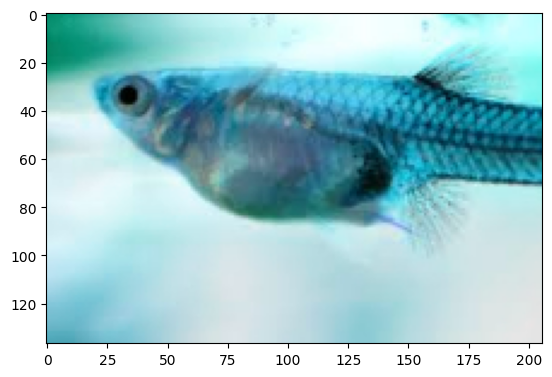

In [61]:
img = cv2.imread('/content/drive/MyDrive/Preg - Final/test/Pregnant Fish/TestP7.jpg')
plt.imshow(img)
plt.show()

In [62]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [63]:
scaled_image.shape

TensorShape([128, 128, 3])

In [64]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [65]:
yhat = model1.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 29ms/step


In [66]:
yhat

array([[0.4226223]], dtype=float32)

In [67]:
class_names

['Not Pregnant Fish', 'Pregnant Fish']

In [68]:
if yhat > 0.1:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

Pregnant Fish


# Save and Load Model

In [71]:
model.save('saved_model/my_model0')

In [72]:
model1.save('saved_model/my_model1')

In [73]:
new_model = tf.keras.models.load_model('/content/saved_model/my_model0')

In [74]:
yhat = new_model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 304ms/step


In [75]:
yhat

array([[0.3819265]], dtype=float32)

In [76]:
if yhat > 0.1:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

Pregnant Fish


# Transfer Learning

In [11]:
Xception = tf.keras.applications.xception.Xception(include_top=False,
                                                    input_shape=(128,128,3),
                                                    weights="imagenet",
                                                    pooling='max')

for layer in Xception.layers:
        layer.trainable=False

83683744/83683744 [==============================] - 1s 0us/step


# **Model Building**

In [12]:
model = tf.keras.models.Sequential()

model.add(Xception)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21144425 (80.66 MB)
Trainable params: 2829

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# **Model Training**

In [16]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/10
21/21 [==============================] - 30s 1s/step - loss: 0.7066 - accuracy: 0.5305 - val_loss: 0.7647 - val_accuracy: 0.6129
Epoch 2/10
21/21 [==============================] - 2s 57ms/step - loss: 0.4543 - accuracy: 0.7866 - val_loss: 0.6053 - val_accuracy: 0.7097
Epoch 3/10
21/21 [==============================] - 2s 76ms/step - loss: 0.2799 - accuracy: 0.8902 - val_loss: 0.9788 - val_accuracy: 0.6774
Epoch 4/10
21/21 [==============================] - 1s 41ms/step - loss: 0.2306 - accuracy: 0.9146 - val_loss: 0.7574 - val_accuracy: 0.7419
Epoch 5/10
21/21 [==============================] - 1s 40ms/step - loss: 0.0788 - accuracy: 0.9878 - val_loss: 0.9608 - val_accuracy: 0.7097
Epoch 6/10
21/21 [==============================] - 1s 44ms/step - loss: 0.0323 - accuracy: 0.9939 - val_loss: 1.2153 - val_accuracy: 0.7097
Epoch 7/10
21/21 [==============================] - 1s 43ms/step - loss: 0.0536 - accuracy: 0.9756 - val_loss: 1.0088 - val_accuracy: 0.7742
Epoch 8/10
21/

In [17]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 42.133 seconds


# **Performance Analysis**

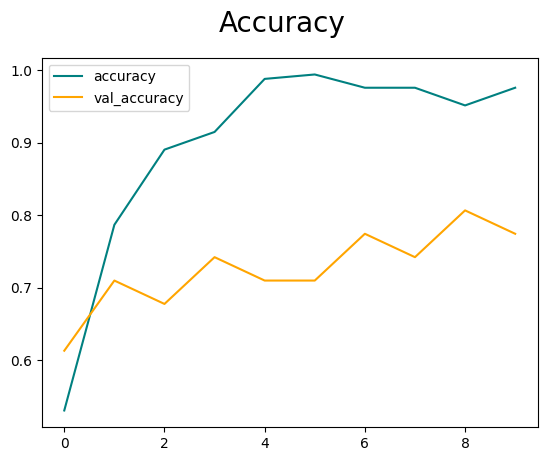

In [19]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Model Evaluation**

In [20]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [21]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 1s 606ms/step


In [22]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.85714287>

In [23]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9230769>

In [24]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.88461536>

# **Save**

In [25]:
model.save('saved_model/my_model2')